In [1]:
!wget https://pai-public-data.oss-cn-beijing.aliyuncs.com/speed_dating/Speed%20Dating%20Data%20Key.doc

--2021-01-05 07:47:22--  https://pai-public-data.oss-cn-beijing.aliyuncs.com/speed_dating/Speed%20Dating%20Data%20Key.doc
Resolving pai-public-data.oss-cn-beijing.aliyuncs.com (pai-public-data.oss-cn-beijing.aliyuncs.com)... 59.110.185.63
Connecting to pai-public-data.oss-cn-beijing.aliyuncs.com (pai-public-data.oss-cn-beijing.aliyuncs.com)|59.110.185.63|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 161792 (158K) [application/msword]
Saving to: ‘Speed Dating Data Key.doc.14’

100%[======================================>] 161,792     --.-K/s   in 0.1s    

2021-01-05 07:47:23 (1.59 MB/s) - ‘Speed Dating Data Key.doc.14’ saved [161792/161792]



In [2]:
!wget https://pai-public-data.oss-cn-beijing.aliyuncs.com/speed_dating/Speed%20Dating%20Data.csv

--2021-01-05 07:47:25--  https://pai-public-data.oss-cn-beijing.aliyuncs.com/speed_dating/Speed%20Dating%20Data.csv
Resolving pai-public-data.oss-cn-beijing.aliyuncs.com (pai-public-data.oss-cn-beijing.aliyuncs.com)... 59.110.185.63
Connecting to pai-public-data.oss-cn-beijing.aliyuncs.com (pai-public-data.oss-cn-beijing.aliyuncs.com)|59.110.185.63|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 5192296 (5.0M) [text/csv]
Saving to: ‘Speed Dating Data.csv.14’

100%[======================================>] 5,192,296   19.6MB/s   in 0.3s   

2021-01-05 07:47:26 (19.6 MB/s) - ‘Speed Dating Data.csv.14’ saved [5192296/5192296]



In [3]:
!pip install palettable --user

Looking in indexes: https://mirrors.aliyun.com/pypi/simple


In [4]:
!pip install imbalanced-learn --user

Looking in indexes: https://mirrors.aliyun.com/pypi/simple


In [5]:
!pip install seaborn --user

Looking in indexes: https://mirrors.aliyun.com/pypi/simple


In [6]:
!pip install imblearn --user

Looking in indexes: https://mirrors.aliyun.com/pypi/simple


In [7]:
# importing packages
%matplotlib inline
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import GradientBoostingClassifier
from sklearn import metrics

from sklearn import linear_model, metrics, preprocessing, svm
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import (accuracy_score, average_precision_score,
                             precision_recall_curve)
from sklearn.neighbors import KNeighborsClassifier

import imblearn
from palettable.colorbrewer.qualitative import Pastel1_3

/opt/conda/lib/python3.6/site-packages/sklearn/ensemble/weight_boosting.py:29: DeprecationWarning: numpy.core.umath_tests is an internal NumPy module and should not be imported. It will be removed in a future NumPy release.
  from numpy.core.umath_tests import inner1d


In [8]:
df = pd.read_csv('Speed Dating Data.csv', encoding='gbk')
df.head()

,iid,id,gender,idg,condtn,wave,round,position,positin1,order,...,attr3_3,sinc3_3,intel3_3,fun3_3,amb3_3,attr5_3,sinc5_3,intel5_3,fun5_3,amb5_3
0,1,1.0,0,1,1,1,10,7,NaN,4,...,5.0,7.0,7.0,7.0,7.0,NaN,NaN,NaN,NaN,NaN
1,1,1.0,0,1,1,1,10,7,NaN,3,...,5.0,7.0,7.0,7.0,7.0,NaN,NaN,NaN,NaN,NaN
2,1,1.0,0,1,1,1,10,7,NaN,10,...,5.0,7.0,7.0,7.0,7.0,NaN,NaN,NaN,NaN,NaN
3,1,1.0,0,1,1,1,10,7,NaN,5,...,5.0,7.0,7.0,7.0,7.0,NaN,NaN,NaN,NaN,NaN
4,1,1.0,0,1,1,1,10,7,NaN,7,...,5.0,7.0,7.0,7.0,7.0,NaN,NaN,NaN,NaN,NaN


In [36]:
print(df.shape)

(8378, 195)


In [37]:
percent_missing = df.isnull().sum() * 100 / len(df)
missing_value_df = pd.DataFrame({
    'column_name': df.columns,
    'percent_missing': percent_missing
})
missing_value_df.sort_values(by='percent_missing')

,column_name,percent_missing
iid,iid,0.000000
dec_o,dec_o,0.000000
samerace,samerace,0.000000
match,match,0.000000
partner,partner,0.000000
...,...,...
amb7_2,amb7_2,76.665075
sinc7_2,sinc7_2,76.665075
expnum,expnum,78.515159
numdat_3,numdat_3,82.143710


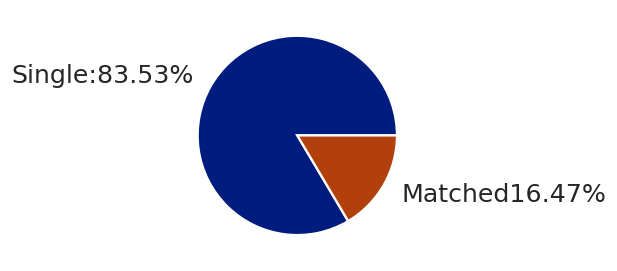

In [63]:
# 多少人通过Speed Dating找到了对象
plt.subplots(figsize=(3,3), dpi=110,)
# 构造数据
size_of_groups=df.match.value_counts().values

single_percentage = round(size_of_groups[0]/sum(size_of_groups) * 100,2) 
matched_percentage = round(size_of_groups[1]/sum(size_of_groups)* 100,2) 
names = [
    'Single:' + str(single_percentage) + '%',
    'Matched' + str(matched_percentage) + '%']
 
# 创建饼图
plt.pie(
    size_of_groups, 
    labels=names, 
    labeldistance=1.2, 
)
plt.show()

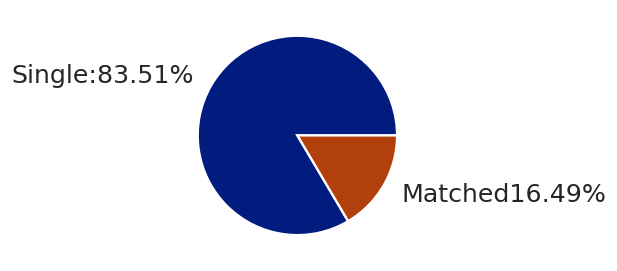

In [62]:
df[df.gender == 0]

# 多少女生通过Speed Dating找到了对象
plt.subplots(figsize=(3,3), dpi=110,)
# 构造数据
size_of_groups=df[df.gender == 0].match.value_counts().values 
single_percentage = round(size_of_groups[0]/sum(size_of_groups) * 100,2) 
matched_percentage = round(size_of_groups[1]/sum(size_of_groups)* 100,2) 
names = [
    'Single:' + str(single_percentage) + '%',
    'Matched' + str(matched_percentage) + '%']
 
# 创建饼图
plt.pie(
    size_of_groups, 
    labels=names, 
    labeldistance=1.2, 
)
plt.show()

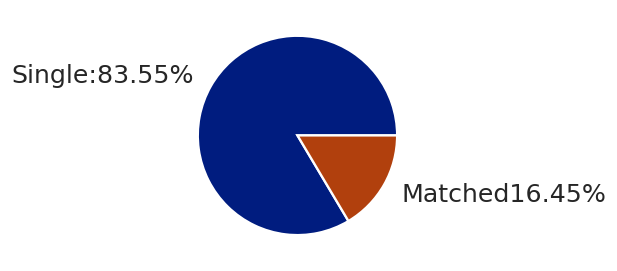

In [61]:
df[df.gender == 0]

# 多少男生通过Speed Dating找到了对象
plt.subplots(figsize=(3,3), dpi=110,)
# 构造数据
size_of_groups=df[df.gender == 1].match.value_counts().values 
single_percentage = round(size_of_groups[0]/sum(size_of_groups) * 100,2) 
matched_percentage = round(size_of_groups[1]/sum(size_of_groups)* 100,2) 
names = [
    'Single:' + str(single_percentage) + '%',
    'Matched' + str(matched_percentage) + '%']
 
# 创建饼图
plt.pie(
    size_of_groups, 
    labels=names, 
    labeldistance=1.2, 
)
plt.show()

Text(0, 0.5, 'Frequency')

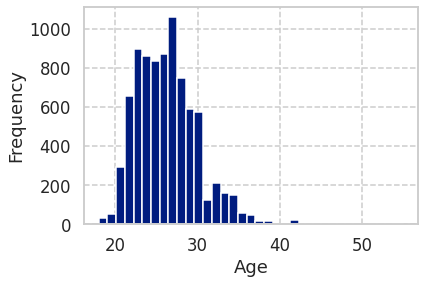

In [40]:
# 年龄分布
age = df[np.isfinite(df['age'])]['age']
plt.hist(age,bins=35)
plt.xlabel('Age')
plt.ylabel('Frequency')

<AxesSubplot:title={'center':'Correlation Heatmap'}>

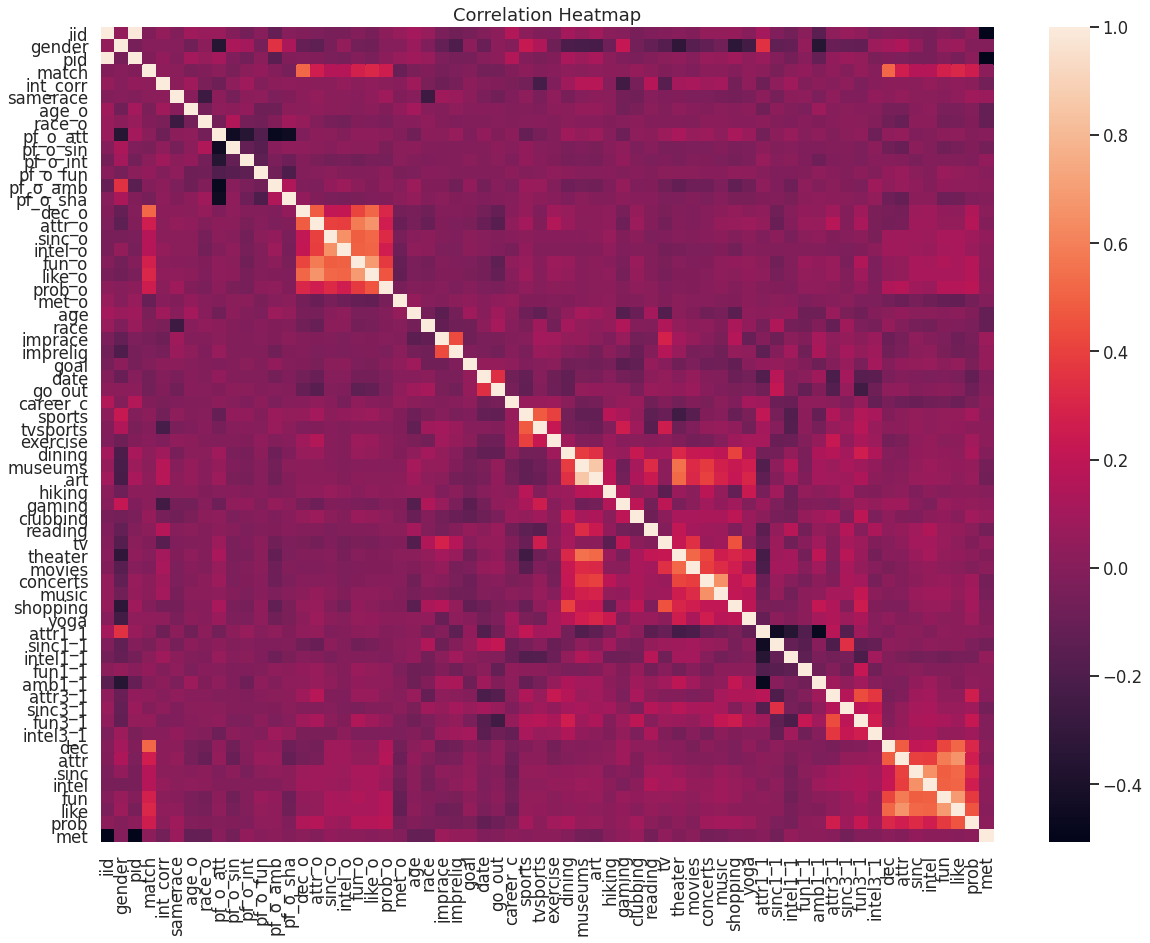

In [41]:
date_df = df[[
    'iid', 'gender', 'pid', 'match', 'int_corr', 'samerace', 'age_o',
       'race_o', 'pf_o_att', 'pf_o_sin', 'pf_o_int', 'pf_o_fun', 'pf_o_amb',
       'pf_o_sha', 'dec_o', 'attr_o', 'sinc_o', 'intel_o', 'fun_o', 'like_o',
       'prob_o', 'met_o', 'age','race', 'imprace', 'imprelig', 'goal', 'date',
       'go_out', 'career_c', 'sports', 'tvsports', 'exercise', 'dining',
       'museums', 'art', 'hiking', 'gaming', 'clubbing', 'reading', 'tv',
       'theater', 'movies', 'concerts', 'music', 'shopping', 'yoga', 'attr1_1',
       'sinc1_1', 'intel1_1', 'fun1_1', 'amb1_1', 'attr3_1', 'sinc3_1',
       'fun3_1', 'intel3_1', 'dec', 'attr', 'sinc', 'intel', 'fun', 'like',
       'prob', 'met'
]]

# heatmap
plt.subplots(figsize=(20,15))
ax = plt.axes()
ax.set_title("Correlation Heatmap")
corr = date_df.corr()
sns.heatmap(corr, 
            xticklabels=corr.columns.values,
            yticklabels=corr.columns.values)

In [31]:
import itertools
from sklearn.metrics import confusion_matrix

# 绘制混淆矩阵
def plot_confusion_matrix(model, normalize=False): 
    cm = confusion_matrix(y_test, model, labels=[0, 1])
    classes=["Match Success", "Match Failed"]
    cmap = plt.cm.Blues
    title = "Confusion Matrix"
    if normalize:
        cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]
        cm = np.around(cm, decimals=3)
    plt.imshow(cm, interpolation='nearest', cmap=cmap)
    plt.title(title)
    plt.colorbar()
    tick_marks = np.arange(len(classes))
    plt.xticks(tick_marks, classes, rotation=45)
    plt.yticks(tick_marks, classes)
    thresh = cm.max() / 2.
    for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
        plt.text(j, i, cm[i, j],
                 horizontalalignment="center",
                 color="white" if cm[i, j] > thresh else "black")
    plt.tight_layout()
    plt.ylabel('True label')
    plt.xlabel('Predicted label')

In [32]:
import seaborn as sns
sns.set('talk', 'whitegrid', 'dark', font_scale=1,rc={"lines.linewidth": 2, 'grid.linestyle': '--'})
def plotAUC(truth, pred, lab):
    fpr, tpr, _ = metrics.roc_curve(truth,pred)
    roc_auc = metrics.auc(fpr, tpr)
    lw = 2
    c = (np.random.rand(), np.random.rand(), np.random.rand())
    plt.plot(fpr, tpr, color= c,lw=lw, label= lab +'(AUC = %0.2f)' % roc_auc)
    plt.plot([0, 1], [0, 1], color='navy', lw=lw, linestyle='--')
    plt.xlim([0.0, 1.0])
    plt.ylim([0.0, 1.0])
    plt.xlabel('False Positive Rate')
    plt.ylabel('True Positive Rate')
    plt.title('ROC curve') #Receiver Operating Characteristic ROC曲线
    plt.legend(loc="lower right")

In [33]:
# preparing the data
from pandas import Series, DataFrame

clean_df = df[['attr_o','sinc_o','intel_o','fun_o','amb_o','shar_o','match']]
clean_df.dropna(inplace=True)
clean_df.reset_index(drop=True, inplace=True)

print("clean_df",clean_df)

X=clean_df[['attr_o','sinc_o','intel_o','fun_o','amb_o','shar_o',]]
y=clean_df['match']

from imblearn.over_sampling import SMOTE
from sklearn.utils import shuffle
from pandas import Series, DataFrame

# 定义SMOTE模型，random_state相当于随机数种子的作用
smo = SMOTE(random_state=42)
X, y = smo.fit_sample(X, y)

X = DataFrame(X,columns=['attr_o','sinc_o','intel_o','fun_o','amb_o','shar_o'])
y = DataFrame(y,columns=['match'])

clean_df = pd.concat([X,y],axis=1)

clean_df = clean_df.reindex(np.random.permutation(clean_df.index))
clean_df = clean_df.reset_index(drop=True)
print("clean_df",clean_df)

X=clean_df[['attr_o','sinc_o','intel_o','fun_o','amb_o','shar_o',]]
y=clean_df['match'].ravel()

#print(y)
#print(type(y))
#print(X)
#print(type(X))
#print(X.shape)

y = Series(y)
#print(y)
#print(type(y))

X_train = X.iloc[0:10000]
X_test = X.iloc[10000:]
y_train = y.iloc[0:10000]
y_test = y.iloc[10000:]
print(y_test)

X_train_labeled = X_train.iloc[0:2000]
y_train_labeled = y_train.iloc[0:2000]
X_train_unlabeled = X_train.iloc[2000:]
print("X_train_labeled",X_train_labeled)
print("X_train_unlabeled",X_train_unlabeled)
print("y_train_labeled",y_train_labeled)

clean_df       attr_o  sinc_o  intel_o  fun_o  amb_o  shar_o  match
0        6.0     8.0      8.0    8.0    8.0     6.0      0
1        7.0     8.0     10.0    7.0    7.0     5.0      0
2       10.0    10.0     10.0   10.0   10.0    10.0      1
3        7.0     8.0      9.0    8.0    9.0     8.0      1
4        8.0     7.0      9.0    6.0    9.0     7.0      1
...      ...     ...      ...    ...    ...     ...    ...
7026    10.0     5.0      3.0    2.0    6.0     5.0      0
7027     6.0     3.0      7.0    3.0    7.0     2.0      0
7028     2.0     1.0      2.0    2.0    2.0     1.0      0
7029     5.0     7.0      5.0    5.0    3.0     6.0      0
7030     8.0     8.0      7.0    7.0    7.0     7.0      0

[7031 rows x 7 columns]
clean_df        attr_o     sinc_o    intel_o      fun_o      amb_o    shar_o  match
0         4.0   8.000000   6.000000   5.000000   5.000000  7.000000      0
1         7.0   8.000000   9.000000   7.405472   8.000000  8.594528      1
2         5.0   7.000000

/opt/conda/lib/python3.6/site-packages/ipykernel_launcher.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """


In [ ]:
#from imblearn.over_sampling import SMOTE
#X, y = SMOTE().fit_resample(X, y)

In [ ]:
#X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=0, stratify=y)

In [34]:
#随机森林，监督学习
from sklearn.model_selection import RandomizedSearchCV
rf = RandomForestClassifier(criterion='gini', random_state=0)
maxFeatures = range(1,clean_df.shape[1]-1)
param_dist = dict(max_features=maxFeatures)
rand = RandomizedSearchCV(rf, param_dist, cv=10, scoring='accuracy', n_iter=len(maxFeatures), random_state=10)
X=X_train_labeled.values
y=y_train_labeled.values
rand.fit(X,y)

RandomizedSearchCV(cv=10, error_score='raise',
          estimator=RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
            max_depth=None, max_features='auto', max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, n_estimators=10, n_jobs=1,
            oob_score=False, random_state=0, verbose=0, warm_start=False),
          fit_params=None, iid=True, n_iter=5, n_jobs=1,
          param_distributions={'max_features': range(1, 6)},
          pre_dispatch='2*n_jobs', random_state=10, refit=True,
          return_train_score='warn', scoring='accuracy', verbose=0)

In [4]:
m1 = range(1,6)
param_dist = dict(m=m1)
param_dist

{'m': range(1, 6)}

In [35]:
mean_scores = [result for result in rand.cv_results_['mean_test_score']]
print('Best Accuracy = '+str(rand.best_score_))
print(rand.best_estimator_)

Best Accuracy = 0.7815
RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
            max_depth=None, max_features=1, max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, n_estimators=10, n_jobs=1,
            oob_score=False, random_state=0, verbose=0, warm_start=False)


In [40]:
randomForest = RandomForestClassifier(
    bootstrap=True,
    criterion="gini",
    max_features=rand.best_estimator_.max_features,
    random_state=0)

from time import time
start_time = time()
randomForest.fit(X_train_labeled,y_train_labeled)
end_time = time()
train_rbf_time = end_time - start_time
print("train_rf_time : ",train_rbf_time)

rfPredict = randomForest.predict(X_test)
rfPredictproba = randomForest.predict_proba(X_test)[:,1]
rfAccuracy= accuracy_score(y_test,rfPredict)
roc_score = metrics.roc_auc_score(y_test,rfPredict)
print("rfAccuracy",rfAccuracy)

train_rf_time :  0.05037117004394531
rfAccuracy 0.7591687041564792


Random Forest accuracy is  0.7713936430317848


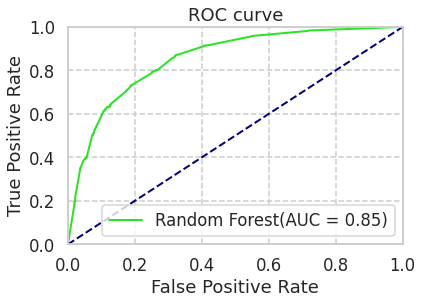

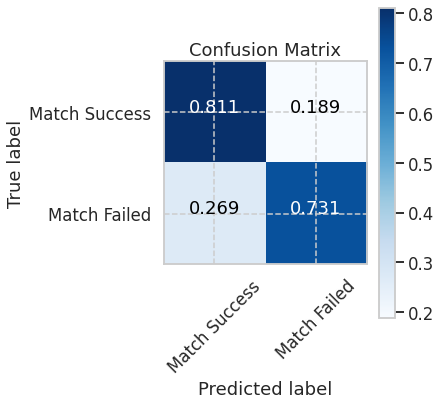

In [37]:
print("Random Forest accuracy is ",rfAccuracy)
plotAUC(y_test,rfPredictproba, 'Random Forest')
plt.show()
plt.figure(figsize=(6,6))
plot_confusion_matrix(rfPredict, normalize=True)
plt.show()

In [38]:
#self-training
#考虑使用随机森林模型
from pandas import Series, DataFrame
from time import time
start_time = time()

semi_randomForest = RandomForestClassifier(
    bootstrap=True,
    criterion="gini",
    max_features=rand.best_estimator_.max_features,
    random_state=0)

for j in range(0,80):
    semi_randomForest.fit(X_train_labeled,y_train_labeled)
    y_predict_unlabeled = semi_randomForest.predict(X_train_unlabeled)
    #print(y_predict_unlabeled)#0-7999

    a = semi_randomForest.predict_proba(X_train_unlabeled)[:,1]
    sorted_nums = sorted(enumerate(a), key=lambda x: x[1],reverse=True)
    idx = [i[0] for i in sorted_nums] #把置信度按降序排列之后将对应的索引值存储在idx中

    n=len(y_train_labeled)
    for i in range(0,100):
        y_train_labeled[n+i]=y_predict_unlabeled[idx[i]]#有标签的第1000个y增加了
        df_insert = pd.DataFrame({'attr_o':[X_train_unlabeled.iloc[idx[i],0]],'sinc_o':[X_train_unlabeled.iloc[idx[i],1]],'intel_o':[X_train_unlabeled.iloc[idx[i],2]]
                                  ,'fun_o':[X_train_unlabeled.iloc[idx[i],3]],'amb_o':[X_train_unlabeled.iloc[idx[i],4]],'shar_o':[X_train_unlabeled.iloc[idx[i],5]]})
        #iloc 用的是相对值(idx从0-7999,无标签从2000-9999)
        X_train_labeled = X_train_labeled.append(df_insert,ignore_index = True) #有标签的第1000个X增加了
        X_train_unlabeled.drop(2000+idx[i])
    X_train_unlabeled.reset_index(drop=True)
end_time = time()
train_semi_rf_time = end_time - start_time
print("train_semi_rf_time : ",train_semi_rf_time)
print(len(X_train_labeled))
print(len(y_train_labeled))

train_semi_rf_time :  27.16838550567627
10000
10000


Self-training Random Forest accuracy is  0.7591687041564792


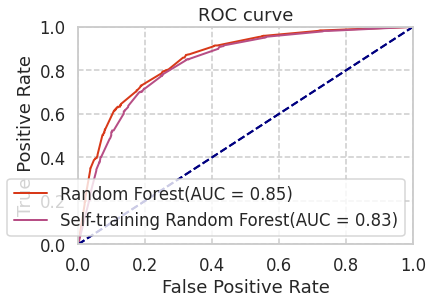

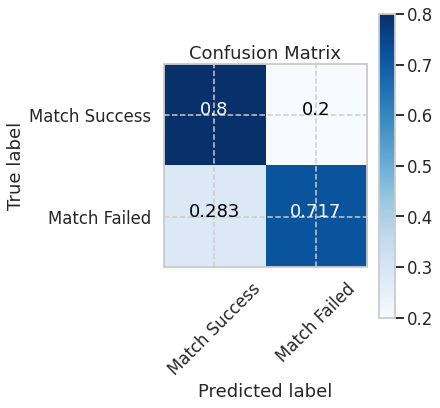

In [39]:
semi_randomForest.fit(X_train_labeled,y_train_labeled)
semi_randomForest_Predict = semi_randomForest.predict_proba(X_test)[:,1]
semi_randomForest_Predict_bin = semi_randomForest.predict(X_test)
semi_randomForest_Accuracy = accuracy_score(y_test,semi_randomForest_Predict.round())
print("Self-training Random Forest accuracy is ",semi_randomForest_Accuracy)
plotAUC(y_test,rfPredictproba,'Random Forest')
plotAUC(y_test,semi_randomForest_Predict,'Self-training Random Forest')

plt.show()
plt.figure(figsize=(6,6))
plot_confusion_matrix(semi_randomForest_Predict_bin, normalize=True)
plt.show()

In [25]:
# preparing the data
from pandas import Series, DataFrame

clean_df = df[['attr_o','sinc_o','intel_o','fun_o','amb_o','shar_o','match']]
clean_df.dropna(inplace=True)
clean_df.reset_index(drop=True, inplace=True)

X=clean_df[['attr_o','sinc_o','intel_o','fun_o','amb_o','shar_o',]]
y=clean_df['match']

from imblearn.over_sampling import SMOTE
from sklearn.utils import shuffle
from pandas import Series, DataFrame

# 定义SMOTE模型，random_state相当于随机数种子的作用
smo = SMOTE(random_state=42)
X, y = smo.fit_sample(X, y)

X = DataFrame(X,columns=['attr_o','sinc_o','intel_o','fun_o','amb_o','shar_o'])
y = DataFrame(y,columns=['match'])

clean_df = pd.concat([X,y],axis=1)

clean_df = clean_df.reindex(np.random.permutation(clean_df.index))
clean_df = clean_df.reset_index(drop=True)
#print(clean_df)

X=clean_df[['attr_o','sinc_o','intel_o','fun_o','amb_o','shar_o',]]
y=clean_df['match'].ravel()

#print(y)
#print(type(y))
#print(X)
#print(type(X))
#print(X.shape)

y = Series(y)
#print(y)
#print(type(y))

X_train = X.iloc[0:10000]
X_test = X.iloc[10000:]
y_train = y.iloc[0:10000]
y_test = y.iloc[10000:]
print(y_test)

X_train_labeled = X_train.iloc[0:2000]
y_train_labeled = y_train.iloc[0:2000]
X_train_unlabeled = X_train.iloc[2000:]
print(X_train_labeled)
print(X_train_unlabeled)
print(y_train_labeled)

10000    1
10001    1
10002    1
10003    1
10004    1
        ..
11631    0
11632    1
11633    0
11634    0
11635    0
Length: 1636, dtype: int64
        attr_o  sinc_o   intel_o  fun_o      amb_o   shar_o
0     8.000000     7.0  9.000000    5.0   6.000000  4.00000
1     6.000000     4.0  7.000000    3.0   7.000000  6.00000
2     6.000000     7.0  7.000000    4.0   8.000000  6.00000
3     6.000000     8.0  9.000000    6.0   9.000000  8.00000
4     5.000000     7.0  5.320536    6.0   3.320536  7.00000
...        ...     ...       ...    ...        ...      ...
1995  8.000000     9.0  8.000000    7.0  10.000000  7.00000
1996  8.000000     8.0  7.000000    6.0   5.000000  4.00000
1997  8.000000     8.0  7.188054    8.0   6.000000  8.00000
1998  6.364355     7.0  8.000000    6.0   8.364355  6.00000
1999  9.474530     9.0  9.000000    9.0   9.000000  6.52547

[2000 rows x 6 columns]
        attr_o  sinc_o  intel_o  fun_o  amb_o    shar_o
2000   2.00000     4.0      6.0    4.0    6.0   3.0

/opt/conda/lib/python3.6/site-packages/ipykernel_launcher.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """


In [24]:
from sklearn.model_selection import GridSearchCV
def cross_validation_best_parameters(model, param_grid):
    grid = GridSearchCV(model, param_grid,cv=10, scoring='accuracy')
    X=clean_df.iloc[:,:-1].values
    y=clean_df.iloc[:,-1].values
    grid.fit(X,y)
    mean_scores = [result for result in grid.cv_results_['mean_test_score']]
    return mean_scores,grid.best_score_,grid.best_estimator_
logreg = linear_model.LogisticRegression(random_state=0)
c=[0.001, 0.01, 0.1, 1, 10, 100, 1000]
param_grid = dict(C=c)
mean_scores,Best_Accuracy, Best_classifier = cross_validation_best_parameters(logreg,param_grid)
print("Best accuracy is "+ str(Best_Accuracy))
print(Best_classifier)

Best accuracy is 0.6995531110347198
LogisticRegression(C=10, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='ovr', n_jobs=1,
          penalty='l2', random_state=0, solver='liblinear', tol=0.0001,
          verbose=0, warm_start=False)


In [27]:
clf_LR = linear_model.LogisticRegression(C=Best_classifier.C)
from time import time
start_time = time()
clf_LR.fit(X_train_labeled,y_train_labeled)
end_time = time()
train_rbf_time = end_time - start_time
print("train_lr_time : ",train_rbf_time)


LR_Predict = clf_LR.predict_proba(X_test)[:,1]
LR_Predict_bin = clf_LR.predict(X_test)
LR_Accuracy = accuracy_score(y_test,LR_Predict.round())
print("Logistic regression accuracy is ",LR_Accuracy)
#plotAUC(y_test,rfPredictproba, 'Random Forest')
#plotAUC(y_test,LR_Predict,'Logistic Regression')
plt.show()
plt.figure(figsize=(6,6))
#plot_confusion_matrix(LR_Predict_bin, normalize=True)
plt.show()

train_lr_time :  0.0057909488677978516
Logistic regression accuracy is  0.6900977995110025


<Figure size 432x432 with 0 Axes>

In [146]:
#for i in range(0,1000):
print(y_train_labeled)

0       0
1       0
2       1
3       1
4       0
       ..
1995    1
1996    1
1997    1
1998    1
1999    0
Length: 2000, dtype: int64


In [28]:
#self-training
#考虑使用logistic回归模型
from pandas import Series, DataFrame
from time import time
start_time = time()

semi_clf_LR = linear_model.LogisticRegression(C=Best_classifier.C)
for j in range(0,80):
    semi_clf_LR.fit(X_train_labeled,y_train_labeled)
    y_predict_unlabeled = semi_clf_LR.predict(X_train_unlabeled)
    #print(y_predict_unlabeled)#0-7999

    a = semi_clf_LR.predict_proba(X_train_unlabeled)[:,1]
    sorted_nums = sorted(enumerate(a), key=lambda x: x[1],reverse=True)
    idx = [i[0] for i in sorted_nums] #把置信度按降序排列之后将对应的索引值存储在idx中
    #print(idx)
    #print(min(idx))
    #print(y_predict_unlabeled[3062])
    #idx从0-7999
    #print(y_predict_unlabeled[0])#0-7999
    #print(X_train_unlabeled)#2000-9999
    #print(X_train_labeled)#0-1999
    #print(len(X_train_labeled))
    #print(len(y_train_labeled))
    n=len(y_train_labeled)
    print(n)
    for i in range(0,100):
        y_train_labeled[n+i]=y_predict_unlabeled[idx[i]]#有标签的第1000个y增加了
        df_insert = pd.DataFrame({'attr_o':[X_train_unlabeled.iloc[idx[i],0]],'sinc_o':[X_train_unlabeled.iloc[idx[i],1]],'intel_o':[X_train_unlabeled.iloc[idx[i],2]]
                                  ,'fun_o':[X_train_unlabeled.iloc[idx[i],3]],'amb_o':[X_train_unlabeled.iloc[idx[i],4]],'shar_o':[X_train_unlabeled.iloc[idx[i],5]]})
        #iloc 用的是相对值(idx从0-7999,无标签从2000-9999)
        X_train_labeled = X_train_labeled.append(df_insert,ignore_index = True) #有标签的第1000个X增加了
        X_train_unlabeled.drop(2000+idx[i])
    X_train_unlabeled.reset_index(drop=True)

end_time = time()
train_semi_lr_time = end_time - start_time
print("train_semi_lr_time : ",train_semi_lr_time)
print(len(X_train_labeled))
print(len(y_train_labeled))

2000
2100
2200
2300
2400
2500
2600
2700
2800
2900
3000
3100
3200
3300
3400
3500
3600
3700
3800
3900
4000
4100
4200
4300
4400
4500
4600
4700
4800
4900
5000
5100
5200
5300
5400
5500
5600
5700
5800
5900
6000
6100
6200
6300
6400
6500
6600
6700
6800
6900
7000
7100
7200
7300
7400
7500
7600
7700
7800
7900
8000
8100
8200
8300
8400
8500
8600
8700
8800
8900
9000
9100
9200
9300
9400
9500
9600
9700
9800
9900
train_semi_lr_time :  37.279953479766846
10000
10000


In [148]:
print(X_train_labeled)
print(y_train_labeled)

         attr_o     sinc_o    intel_o  fun_o  amb_o     shar_o
0      5.000000   6.000000   7.000000    5.0    7.0   4.000000
1      5.000000   8.000000   6.000000    5.0    6.0   4.000000
2      9.553674   8.446326   9.553674    8.0    8.0   8.000000
3      8.000000   8.232767   8.000000    8.0    8.0   4.767233
4      6.000000   7.000000   8.000000    6.0    7.0   5.000000
...         ...        ...        ...    ...    ...        ...
9995  10.000000  10.000000  10.000000   10.0   10.0  10.000000
9996  10.000000  10.000000  10.000000   10.0   10.0  10.000000
9997  10.000000  10.000000  10.000000   10.0   10.0  10.000000
9998  10.000000  10.000000  10.000000   10.0   10.0  10.000000
9999  10.000000  10.000000  10.000000   10.0   10.0  10.000000

[10000 rows x 6 columns]
0       0
1       0
2       1
3       1
4       0
       ..
9995    1
9996    1
9997    1
9998    1
9999    1
Length: 10000, dtype: int64


Self-training Logistic regression accuracy is  0.6986552567237164


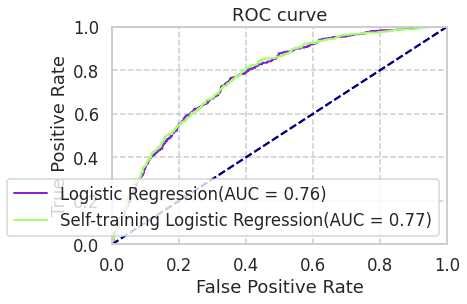

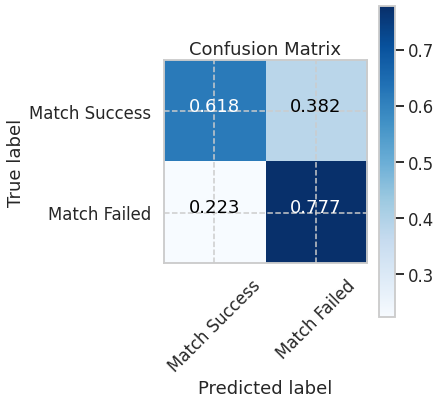

In [88]:
semi_clf_LR.fit(X_train_labeled,y_train_labeled)
semi_LR_Predict = semi_clf_LR.predict_proba(X_test)[:,1]
semi_LR_Predict_bin = semi_clf_LR.predict(X_test)
semi_LR_Accuracy = accuracy_score(y_test,semi_LR_Predict.round())
print("Self-training Logistic regression accuracy is ",semi_LR_Accuracy)
plotAUC(y_test,LR_Predict,'Logistic Regression')
plotAUC(y_test,semi_LR_Predict,'Self-training Logistic Regression')

plt.show()
plt.figure(figsize=(6,6))
plot_confusion_matrix(semi_LR_Predict_bin, normalize=True)
plt.show()

In [91]:
# preparing the data
from pandas import Series, DataFrame

clean_df = df[['attr_o','sinc_o','intel_o','fun_o','amb_o','shar_o','match']]
clean_df.dropna(inplace=True)
clean_df.reset_index(drop=True, inplace=True)

X=clean_df[['attr_o','sinc_o','intel_o','fun_o','amb_o','shar_o',]]
y=clean_df['match']

from imblearn.over_sampling import SMOTE
from sklearn.utils import shuffle
from pandas import Series, DataFrame

# 定义SMOTE模型，random_state相当于随机数种子的作用
smo = SMOTE(random_state=42)
X, y = smo.fit_sample(X, y)

X = DataFrame(X,columns=['attr_o','sinc_o','intel_o','fun_o','amb_o','shar_o'])
y = DataFrame(y,columns=['match'])

clean_df = pd.concat([X,y],axis=1)

clean_df = clean_df.reindex(np.random.permutation(clean_df.index))
clean_df = clean_df.reset_index(drop=True)
#print(clean_df)

X=clean_df[['attr_o','sinc_o','intel_o','fun_o','amb_o','shar_o',]]
y=clean_df['match'].ravel()

#print(y)
#print(type(y))
#print(X)
#print(type(X))
#print(X.shape)

y = Series(y)
#print(y)
#print(type(y))

X_train = X.iloc[0:10000]
X_test = X.iloc[10000:]
y_train = y.iloc[0:10000]
y_test = y.iloc[10000:]
print(y_test)

X_train_labeled = X_train.iloc[0:2000]
y_train_labeled = y_train.iloc[0:2000]
X_train_unlabeled = X_train.iloc[2000:]
print(X_train_labeled)
print(X_train_unlabeled)
print(y_train_labeled)

10000    0
10001    0
10002    0
10003    0
10004    1
        ..
11631    1
11632    1
11633    1
11634    1
11635    1
Length: 1636, dtype: int64
         attr_o    sinc_o    intel_o      fun_o     amb_o    shar_o
0      7.600481  8.000000   9.000000   8.000000  7.000000  8.000000
1      1.000000  5.000000   0.000000  10.000000  0.000000  3.000000
2      4.000000  6.000000   5.000000   5.000000  5.000000  4.000000
3      7.000000  7.000000   7.000000   7.000000  7.000000  7.000000
4      3.000000  8.000000  10.000000   3.000000  6.000000  4.000000
...         ...       ...        ...        ...       ...       ...
1995   7.000000  7.000000   6.000000   8.000000  6.000000  7.771243
1996  10.000000  9.470466   9.470466   6.470466  9.470466  6.000000
1997   7.179358  8.000000   8.820642   8.000000  7.000000  4.000000
1998   6.000000  6.000000   5.000000   6.000000  4.000000  2.000000
1999   7.000000  6.000000  10.000000   7.000000  9.000000  4.000000

[2000 rows x 6 columns]
        att

/opt/conda/lib/python3.6/site-packages/ipykernel_launcher.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """


BaggingClassifier accuracy is  0.8013447432762836


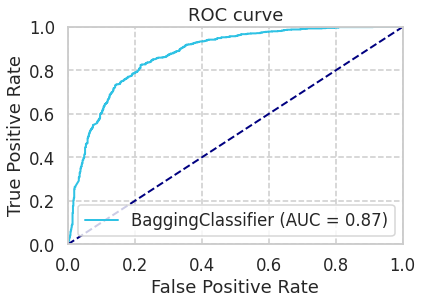

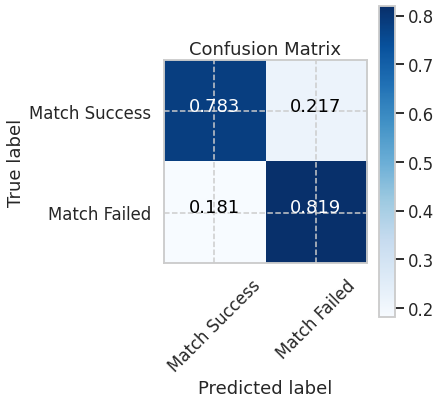

In [92]:
from sklearn import model_selection
from sklearn.ensemble import BaggingClassifier
num_trees = 100
clf_BC = BaggingClassifier(base_estimator=randomForest, n_estimators=num_trees, random_state=7)
clf_BC.fit(X_train_labeled,y_train_labeled)
BC_Predict = clf_BC.predict_proba(X_test)[:,1]
BC_Predict_bin = clf_BC.predict(X_test)
BC_Accuracy = accuracy_score(y_test,BC_Predict.round())
print("BaggingClassifier accuracy is ",BC_Accuracy)
#plotAUC(y_test,rfPredictproba, 'Random Forest')
#plotAUC(y_test,LR_Predict,'Logistic Regression')
plotAUC(y_test,BC_Predict,'BaggingClassifier ')

plt.show()
plt.figure(figsize=(6,6))
plot_confusion_matrix(BC_Predict_bin, normalize=True)
plt.show()

In [93]:
#self-training
#考虑使用BaggingClassifier模型
from pandas import Series, DataFrame

semi_clf_BC = BaggingClassifier(base_estimator=randomForest, n_estimators=num_trees, random_state=7)

for j in range(0,80):
    semi_clf_BC.fit(X_train_labeled,y_train_labeled)
    y_predict_unlabeled = semi_clf_BC.predict(X_train_unlabeled)
    #print(y_predict_unlabeled)#0-7999

    a = semi_clf_BC.predict_proba(X_train_unlabeled)[:,1]
    sorted_nums = sorted(enumerate(a), key=lambda x: x[1],reverse=True)
    idx = [i[0] for i in sorted_nums] #把置信度按降序排列之后将对应的索引值存储在idx中
    #print(idx)
    #print(min(idx))
    #print(y_predict_unlabeled[3062])
    #idx从0-7999
    #print(y_predict_unlabeled[0])#0-7999
    #print(X_train_unlabeled)#2000-9999
    #print(X_train_labeled)#0-1999
    #print(len(X_train_labeled))
    #print(len(y_train_labeled))
    n=len(y_train_labeled)
    print(n)
    for i in range(0,100):
        y_train_labeled[n+i]=y_predict_unlabeled[idx[i]]#有标签的第1000个y增加了
        df_insert = pd.DataFrame({'attr_o':[X_train_unlabeled.iloc[idx[i],0]],'sinc_o':[X_train_unlabeled.iloc[idx[i],1]],'intel_o':[X_train_unlabeled.iloc[idx[i],2]]
                                  ,'fun_o':[X_train_unlabeled.iloc[idx[i],3]],'amb_o':[X_train_unlabeled.iloc[idx[i],4]],'shar_o':[X_train_unlabeled.iloc[idx[i],5]]})
        #iloc 用的是相对值(idx从0-7999,无标签从2000-9999)
        X_train_labeled = X_train_labeled.append(df_insert,ignore_index = True) #有标签的第1000个X增加了
        X_train_unlabeled.drop(2000+idx[i])
    X_train_unlabeled.reset_index(drop=True)
print(len(X_train_labeled))
print(len(y_train_labeled))

2000
2100
2200
2300
2400
2500
2600
2700
2800
2900
3000
3100
3200
3300
3400
3500
3600
3700
3800
3900
4000
4100
4200
4300
4400
4600
4700
4800
4900
5000
5100
5200
5300
5400
5500
5600
5700
5800
5900
6000
6100
6200
6300
6400
6500
6600
6700
6800
6900
7000
7100
7200
7300
7400
7500
7600
7700
7800
7900
8000
8100
8200
8300
8400
8500
8600
8700
8800
8900
9000
9100
9200
9300
9400
9500
9600
9700
9800
9900
10000
10000


Self-training Bagging Classifier accuracy is  0.773838630806846


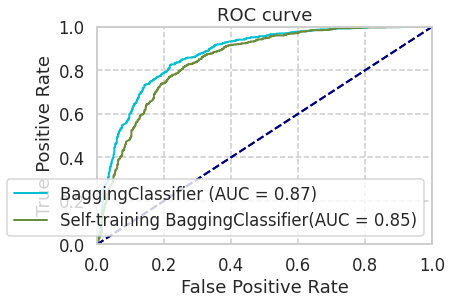

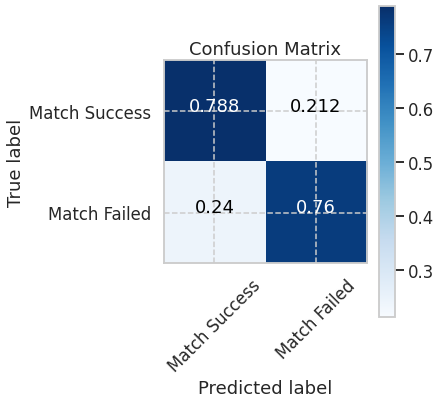

In [94]:
semi_clf_BC.fit(X_train_labeled,y_train_labeled)
semi_clf_BC_Predict = semi_clf_BC.predict_proba(X_test)[:,1]
semi_clf_BC_Predict_bin = semi_clf_BC.predict(X_test)
semi_clf_BC_Accuracy = accuracy_score(y_test,semi_clf_BC_Predict.round())
print("Self-training Bagging Classifier accuracy is ",semi_clf_BC_Accuracy)
plotAUC(y_test,BC_Predict,'BaggingClassifier ')
plotAUC(y_test,semi_clf_BC_Predict,'Self-training BaggingClassifier')

plt.show()
plt.figure(figsize=(6,6))
plot_confusion_matrix(semi_clf_BC_Predict_bin, normalize=True)
plt.show()

In [97]:
# preparing the data
from pandas import Series, DataFrame

clean_df = df[['attr_o','sinc_o','intel_o','fun_o','amb_o','shar_o','match']]
clean_df.dropna(inplace=True)
clean_df.reset_index(drop=True, inplace=True)

X=clean_df[['attr_o','sinc_o','intel_o','fun_o','amb_o','shar_o',]]
y=clean_df['match']

from imblearn.over_sampling import SMOTE
from sklearn.utils import shuffle
from pandas import Series, DataFrame

# 定义SMOTE模型，random_state相当于随机数种子的作用
smo = SMOTE(random_state=42)
X, y = smo.fit_sample(X, y)

X = DataFrame(X,columns=['attr_o','sinc_o','intel_o','fun_o','amb_o','shar_o'])
y = DataFrame(y,columns=['match'])

clean_df = pd.concat([X,y],axis=1)

clean_df = clean_df.reindex(np.random.permutation(clean_df.index))
clean_df = clean_df.reset_index(drop=True)
#print(clean_df)

X=clean_df[['attr_o','sinc_o','intel_o','fun_o','amb_o','shar_o',]]
y=clean_df['match'].ravel()

#print(y)
#print(type(y))
#print(X)
#print(type(X))
#print(X.shape)

y = Series(y)
#print(y)
#print(type(y))

X_train = X.iloc[0:10000]
X_test = X.iloc[10000:]
y_train = y.iloc[0:10000]
y_test = y.iloc[10000:]
print(y_test)

X_train_labeled = X_train.iloc[0:2000]
y_train_labeled = y_train.iloc[0:2000]
X_train_unlabeled = X_train.iloc[2000:]
print(X_train_labeled)
print(X_train_unlabeled)
print(y_train_labeled)

10000    0
10001    0
10002    0
10003    0
10004    1
        ..
11631    0
11632    0
11633    1
11634    1
11635    1
Length: 1636, dtype: int64
        attr_o     sinc_o   intel_o     fun_o     amb_o    shar_o
0     5.190693   3.404654  5.000000  4.000000  3.786039  1.404654
1     6.000000   8.000000  7.000000  6.000000  5.000000  7.000000
2     7.000000   7.000000  9.000000  8.000000  8.000000  5.000000
3     8.128666   8.000000  9.000000  9.000000  9.128666  9.128666
4     6.000000   5.000000  5.000000  5.000000  5.000000  5.000000
...        ...        ...       ...       ...       ...       ...
1995  7.000000  10.000000  8.054285  5.054285  6.945715  3.945715
1996  6.000000   7.000000  7.000000  5.000000  7.000000  5.000000
1997  7.000000   6.000000  5.000000  6.000000  7.000000  6.000000
1998  7.125256   9.000000  9.000000  8.000000  8.000000  8.000000
1999  6.000000   6.000000  8.000000  6.000000  7.000000  6.000000

[2000 rows x 6 columns]
         attr_o     sinc_o    intel

/opt/conda/lib/python3.6/site-packages/ipykernel_launcher.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """


AdaBoost accuracy is  0.7530562347188264


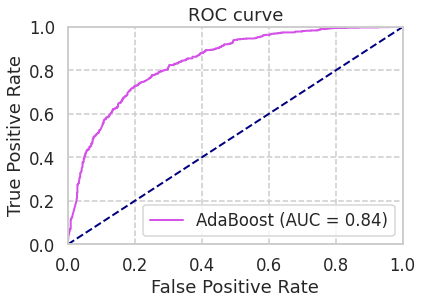

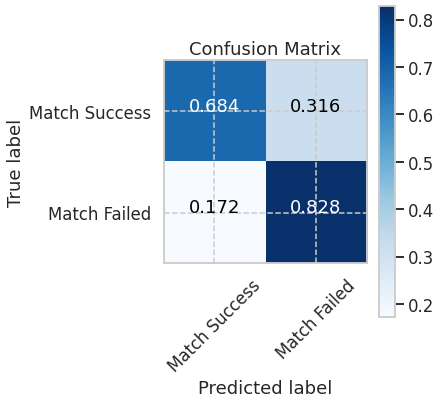

In [98]:
from sklearn.model_selection import cross_val_score
from sklearn.ensemble import AdaBoostClassifier
clf_Ada = AdaBoostClassifier(n_estimators=50)
clf_Ada.fit(X_train_labeled,y_train_labeled)
Ada_Predict = clf_Ada.predict_proba(X_test)[:,1]
Ada_Predict_bin = clf_Ada.predict(X_test)
Ada_Accuracy = accuracy_score(y_test,Ada_Predict.round())
print("AdaBoost accuracy is ",Ada_Accuracy)
#plotAUC(y_test,rfPredictproba, 'Random Forest')
#plotAUC(y_test,LR_Predict,'Logistic Regression')
#plotAUC(y_test,BC_Predict,'BaggingClassifier ')
plotAUC(y_test,Ada_Predict,'AdaBoost ')
plt.show()
plt.figure(figsize=(6,6))
plot_confusion_matrix(Ada_Predict_bin, normalize=True)
plt.show()

In [99]:
#self-training
#考虑使用AdaBoostClassifier模型
from pandas import Series, DataFrame
semi_clf_Ada = AdaBoostClassifier(n_estimators=50)

for j in range(0,80):
    semi_clf_Ada.fit(X_train_labeled,y_train_labeled)
    y_predict_unlabeled = semi_clf_Ada.predict(X_train_unlabeled)
    #print(y_predict_unlabeled)#0-7999

    a = semi_clf_Ada.predict_proba(X_train_unlabeled)[:,1]
    sorted_nums = sorted(enumerate(a), key=lambda x: x[1],reverse=True)
    idx = [i[0] for i in sorted_nums] #把置信度按降序排列之后将对应的索引值存储在idx中
    #print(idx)
    #print(min(idx))
    #print(y_predict_unlabeled[3062])
    #idx从0-7999
    #print(y_predict_unlabeled[0])#0-7999
    #print(X_train_unlabeled)#2000-9999
    #print(X_train_labeled)#0-1999
    #print(len(X_train_labeled))
    #print(len(y_train_labeled))
    n=len(y_train_labeled)
    print(n)
    for i in range(0,100):
        y_train_labeled[n+i]=y_predict_unlabeled[idx[i]]#有标签的第1000个y增加了
        df_insert = pd.DataFrame({'attr_o':[X_train_unlabeled.iloc[idx[i],0]],'sinc_o':[X_train_unlabeled.iloc[idx[i],1]],'intel_o':[X_train_unlabeled.iloc[idx[i],2]]
                                  ,'fun_o':[X_train_unlabeled.iloc[idx[i],3]],'amb_o':[X_train_unlabeled.iloc[idx[i],4]],'shar_o':[X_train_unlabeled.iloc[idx[i],5]]})
        #iloc 用的是相对值(idx从0-7999,无标签从2000-9999)
        X_train_labeled = X_train_labeled.append(df_insert,ignore_index = True) #有标签的第1000个X增加了
        X_train_unlabeled.drop(2000+idx[i])
    X_train_unlabeled.reset_index(drop=True)
print(len(X_train_labeled))
print(len(y_train_labeled))

2000
2100
2200
2300
2400
2500
2600
2700
2800
2900
3000
3100
3200
3300
3400
3500
3600
3700
3800
3900
4000
4100
4200
4300
4400
4500
4600
4700
4800
4900
5000
5100
5200
5300
5400
5500
5600
5700
5800
5900
6000
6100
6200
6300
6400
6500
6600
6700
6800
6900
7000
7100
7200
7300
7400
7500
7600
7700
7800
7900
8000
8100
8200
8300
8400
8500
8600
8700
8800
8900
9000
9100
9200
9300
9400
9500
9600
9700
9800
9900
10000
10000


Self-training AdaBoostClassifier accuracy is  0.7353300733496333


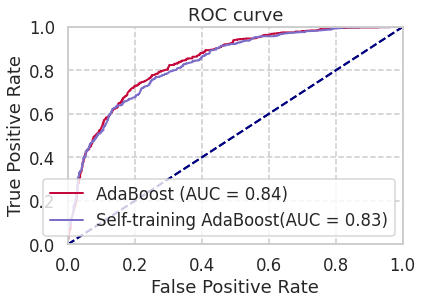

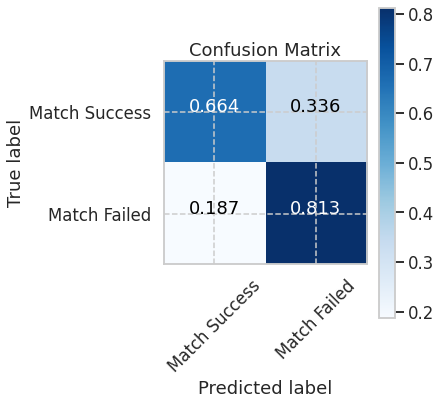

In [100]:
semi_clf_Ada.fit(X_train_labeled,y_train_labeled)
semi_clf_Ada_Predict = semi_clf_Ada.predict_proba(X_test)[:,1]
semi_clf_Ada_Predict_bin = semi_clf_Ada.predict(X_test)
semi_clf_Ada_Accuracy = accuracy_score(y_test,semi_clf_Ada_Predict.round())
print("Self-training AdaBoostClassifier accuracy is ",semi_clf_Ada_Accuracy)
plotAUC(y_test,Ada_Predict,'AdaBoost ')
plotAUC(y_test,semi_clf_Ada_Predict,'Self-training AdaBoost')

plt.show()
plt.figure(figsize=(6,6))
plot_confusion_matrix(semi_clf_Ada_Predict_bin, normalize=True)
plt.show()

In [101]:
# preparing the data
from pandas import Series, DataFrame

clean_df = df[['attr_o','sinc_o','intel_o','fun_o','amb_o','shar_o','match']]
clean_df.dropna(inplace=True)
clean_df.reset_index(drop=True, inplace=True)

X=clean_df[['attr_o','sinc_o','intel_o','fun_o','amb_o','shar_o',]]
y=clean_df['match']

from imblearn.over_sampling import SMOTE
from sklearn.utils import shuffle
from pandas import Series, DataFrame

# 定义SMOTE模型，random_state相当于随机数种子的作用
smo = SMOTE(random_state=42)
X, y = smo.fit_sample(X, y)

X = DataFrame(X,columns=['attr_o','sinc_o','intel_o','fun_o','amb_o','shar_o'])
y = DataFrame(y,columns=['match'])

clean_df = pd.concat([X,y],axis=1)

clean_df = clean_df.reindex(np.random.permutation(clean_df.index))
clean_df = clean_df.reset_index(drop=True)
#print(clean_df)

X=clean_df[['attr_o','sinc_o','intel_o','fun_o','amb_o','shar_o',]]
y=clean_df['match'].ravel()

#print(y)
#print(type(y))
#print(X)
#print(type(X))
#print(X.shape)

y = Series(y)
#print(y)
#print(type(y))

X_train = X.iloc[0:10000]
X_test = X.iloc[10000:]
y_train = y.iloc[0:10000]
y_test = y.iloc[10000:]
print(y_test)

X_train_labeled = X_train.iloc[0:2000]
y_train_labeled = y_train.iloc[0:2000]
X_train_unlabeled = X_train.iloc[2000:]
print(X_train_labeled)
print(X_train_unlabeled)
print(y_train_labeled)

10000    0
10001    1
10002    1
10003    0
10004    0
        ..
11631    0
11632    0
11633    1
11634    0
11635    0
Length: 1636, dtype: int64
      attr_o  sinc_o  intel_o  fun_o  amb_o    shar_o
0        8.0     8.0      8.0    8.0    8.0  5.137148
1        7.0     5.0      7.0    5.0    7.0  5.000000
2        7.0     9.0      9.0    8.0    6.0  7.000000
3        6.0     7.0      7.0    7.0    7.0  7.966576
4        8.0     7.0      8.0    8.0    7.0  6.135746
...      ...     ...      ...    ...    ...       ...
1995     7.0     5.0      7.0    5.0    5.0  4.000000
1996     2.0     3.0      5.0    1.0    2.0  2.000000
1997     7.0     8.0      8.0    8.0    6.0  7.000000
1998     7.0     6.0      8.0    7.5    7.5  3.000000
1999     6.0     8.0      7.0    6.0    7.0  5.000000

[2000 rows x 6 columns]
         attr_o     sinc_o   intel_o      fun_o     amb_o     shar_o
2000   6.500000   7.000000  6.500000   5.000000  5.000000   5.000000
2001   4.000000   7.000000  7.000000   5.

/opt/conda/lib/python3.6/site-packages/ipykernel_launcher.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """


In [102]:
from sklearn.model_selection import GridSearchCV
clf_svm = svm.SVC()
powers = range(0,5)
cs = [10**i for i in powers]
param_grid = dict(C=cs)
grid = GridSearchCV(clf_svm, param_grid, cv=10, scoring='accuracy')
grid.fit(X_train_labeled.values, y_train_labeled.values)
grid_mean_scores = [result for result in grid.cv_results_['mean_test_score']]
print(grid.best_params_)
print("---------------")
print(grid.best_estimator_)

{'C': 10}
---------------
SVC(C=10, cache_size=200, class_weight=None, coef0=0.0,
  decision_function_shape='ovr', degree=3, gamma='auto', kernel='rbf',
  max_iter=-1, probability=False, random_state=None, shrinking=True,
  tol=0.001, verbose=False)


SVM accuracy is  0.7383863080684596


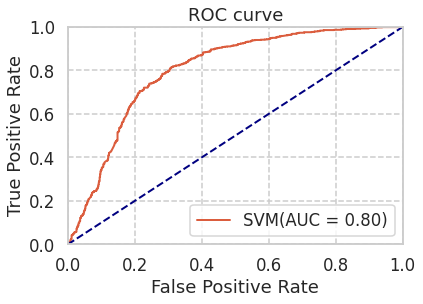

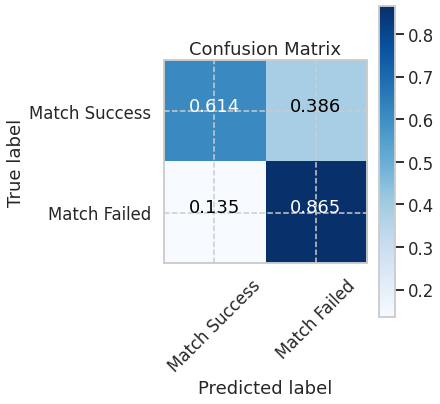

In [103]:
clf_svm = svm.SVC(kernel = "rbf", C=grid.best_estimator_.C)
clf_svm.fit(X_train_labeled.iloc[:,:],y_train_labeled)
predictions_svm = clf_svm.predict(X_test.iloc[:,:])
predictproba_svm = clf_svm.decision_function(X_test.iloc[:,:])
SVM_Accuracy = accuracy_score(y_test,predictions_svm)
print("SVM accuracy is ",SVM_Accuracy)
#plotAUC(y_test,rfPredictproba, 'Random Forest')
#plotAUC(y_test,LR_Predict,'Logistic Regression')
#plotAUC(y_test,BC_Predict,'BaggingClassifier ')
#plotAUC(y_test,Ada_Predict,'AdaBoost ')
plotAUC(y_test,predictproba_svm, 'SVM')
plt.show()
plt.figure(figsize=(6,6))
plot_confusion_matrix(predictions_svm, normalize=True)
plt.show()